In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:\\Users\\sm\\Documents\\Data science\\Examples\\kaggle\\Diabetes_Prediction\\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [18]:
#data.info()
#data.describe()
#data['BMI'].unique()
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [47]:
#data.select_dtypes(include=np.number)
#data.isnull().sum().sort_values(ascending=False)
#dat = data.dropna( axis=0)
#dat = data.drop(['Age'], axis=1)
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

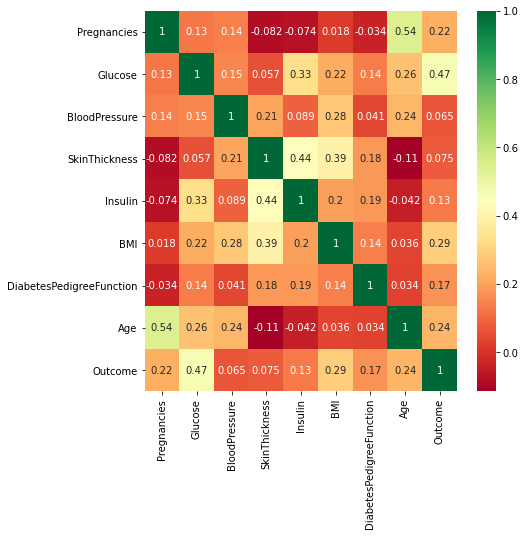

In [109]:
import seaborn as sns
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

In [89]:
from sklearn.model_selection import train_test_split
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=43)

## Check how many other missing(zero) values

In [110]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing Pregnancies: {0}".format(len(data.loc[data['Pregnancies'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {0}".format(len(data.loc[data['Age'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))

total number of rows : 768
number of rows missing glucose: 5
number of rows missing Pregnancies: 111
number of rows missing BloodPressure: 35
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0
number of rows missing SkinThickness: 227


In [115]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=0, strategy="mean")

x_train = imputer.fit_transform(x_train)
x_test = imputer.fit_transform(x_test)

In [121]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=10)
classifier.fit(x_train, y_train.ravel())


RandomForestClassifier(random_state=10)

In [122]:
pred = classifier.predict(x_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, pred)))

Accuracy = 0.747


In [123]:
classifier.score(x_test,y_test)

0.7467532467532467

In [151]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [152]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost 

In [153]:
clf_xgb=xgboost.XGBClassifier()

In [154]:
random_search=RandomizedSearchCV(clf_xgb,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [155]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [156]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.1s finished



 Time taken: 0 hours 0 minutes and 3.43 seconds.


In [157]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=8,
              min_child_weight=7)

In [158]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.2, learning_rate=0.05,
       max_delta_step=0, max_depth=8, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [159]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,x_train,y_train.ravel(),cv=10)

In [160]:
score

array([0.82258065, 0.70967742, 0.74193548, 0.85483871, 0.70491803,
       0.67213115, 0.68852459, 0.72131148, 0.80327869, 0.80327869])

In [161]:
score.mean()

0.7522474881015335